# Script 11: Médias, Máximos e Mínimos - Múltiplos Plots Simultâneos
Neste exemplo vamos adicionar algumas operações no loop e ver um exemplo de como criar multiplos plots em uma mesma imagem.

In [1]:
#-----------------------------------------------------------------------------------------------------------
# Curso INPE / CPTEC Training: NWP Data Processing With Python - Script 11: Average, Maximuns and Minimuns 
# Instrutor: Diego Souza
# Adaptado: Dejanira F Braz
#-----------------------------------------------------------------------------------------------------------
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib                          # Comprehensive library for creating static, animated, and interactive visualizations in Python 
import os                                  # Miscellaneous operating system interfaces 

#----------------------------------------------------------------------------------------------------------- 

# Select the extent [min. lon, min. lat, max. lon, max. lat]
extent = [-78.0, -40.00, -30.00, 12.00]
#-----------------------------------------------------------------------------------------------------------

# Open the GRIB file
file = "Samples/gfs.t00z.pgrb2.0p25.f"

# Data you want to process
hour_ini = 0   # Init time  
hour_end = 24  # End time
hour_int = 3   # Increment

for hour in range(hour_ini, hour_end + 1, hour_int):

    grib = file + str(hour).zfill(3)
    
    # If the file exists
    if (os.path.exists(grib)):
        
        # Process the file
        print("\nProcessing file: ", grib)

        # Read the GRIB file
        grib = pygrib.open(grib)
        
        # Select the variable
        grb = grib.select(name='2 metre temperature')[0]

        # Get information from the file    
        init  = str(grb.analDate)      # Init date / time
        run   = str(grb.hour).zfill(2) # Run
        ftime = str(grb.forecastTime)  # Forecast hour
        valid = str(grb.validDate)     # Valid date / time 
        print('Init: ' + init + ' UTC')
        print('Run: ' + run + 'Z')
        print('Forecast: +' + ftime)
        print('Valid: ' + valid + ' UTC')

        # Read the data for a specific region
        tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        #-----------------------------------------------------------------------------------------------------------

        # Convert from K to °C
        tmtmp = tmtmp - 273.15

        # Smooth the contours
        import scipy.ndimage
        tmtmp = scipy.ndimage.zoom(tmtmp, 3)
        lats = scipy.ndimage.zoom(lats, 3)
        lons = scipy.ndimage.zoom(lons, 3)

        # If it is the first cycle, create the arrays that will store the average values
        if (hour == hour_ini):
            tmtmp_sum = np.zeros((tmtmp.shape[0],tmtmp.shape[1]))
            tmtmp_max = np.full((tmtmp.shape[0],tmtmp.shape[1]),-9999)
            tmtmp_min = np.full((tmtmp.shape[0],tmtmp.shape[1]), 9999)

        # Sum the values
        tmtmp_sum = tmtmp_sum + tmtmp

        # Keep the maximuns
        tmtmp_max = np.maximum(tmtmp,tmtmp_max)

        # Keep the minimuns
        tmtmp_min = np.minimum(tmtmp,tmtmp_min)

# Calculate the average
tmtmp_avg = tmtmp_sum / ((hour_end - hour_ini) / hour_int)

print("\nAverage, Min and Max values stored!")


Processing file:  Samples/gfs.t00z.pgrb2.0p25.f000
Init: 2021-07-26 00:00:00 UTC
Run: 00Z
Forecast: +0
Valid: 2021-07-26 00:00:00 UTC

Processing file:  Samples/gfs.t00z.pgrb2.0p25.f003
Init: 2021-07-23 00:00:00 UTC
Run: 00Z
Forecast: +3
Valid: 2021-07-23 03:00:00 UTC

Processing file:  Samples/gfs.t00z.pgrb2.0p25.f006
Init: 2021-07-23 00:00:00 UTC
Run: 00Z
Forecast: +6
Valid: 2021-07-23 06:00:00 UTC

Processing file:  Samples/gfs.t00z.pgrb2.0p25.f009
Init: 2021-07-23 00:00:00 UTC
Run: 00Z
Forecast: +9
Valid: 2021-07-23 09:00:00 UTC

Processing file:  Samples/gfs.t00z.pgrb2.0p25.f012
Init: 2021-07-23 00:00:00 UTC
Run: 00Z
Forecast: +12
Valid: 2021-07-23 12:00:00 UTC

Processing file:  Samples/gfs.t00z.pgrb2.0p25.f015
Init: 2021-07-23 00:00:00 UTC
Run: 00Z
Forecast: +15
Valid: 2021-07-23 15:00:00 UTC

Processing file:  Samples/gfs.t00z.pgrb2.0p25.f018
Init: 2021-07-23 00:00:00 UTC
Run: 00Z
Forecast: +18
Valid: 2021-07-23 18:00:00 UTC

Processing file:  Samples/gfs.t00z.pgrb2.0p25.f021


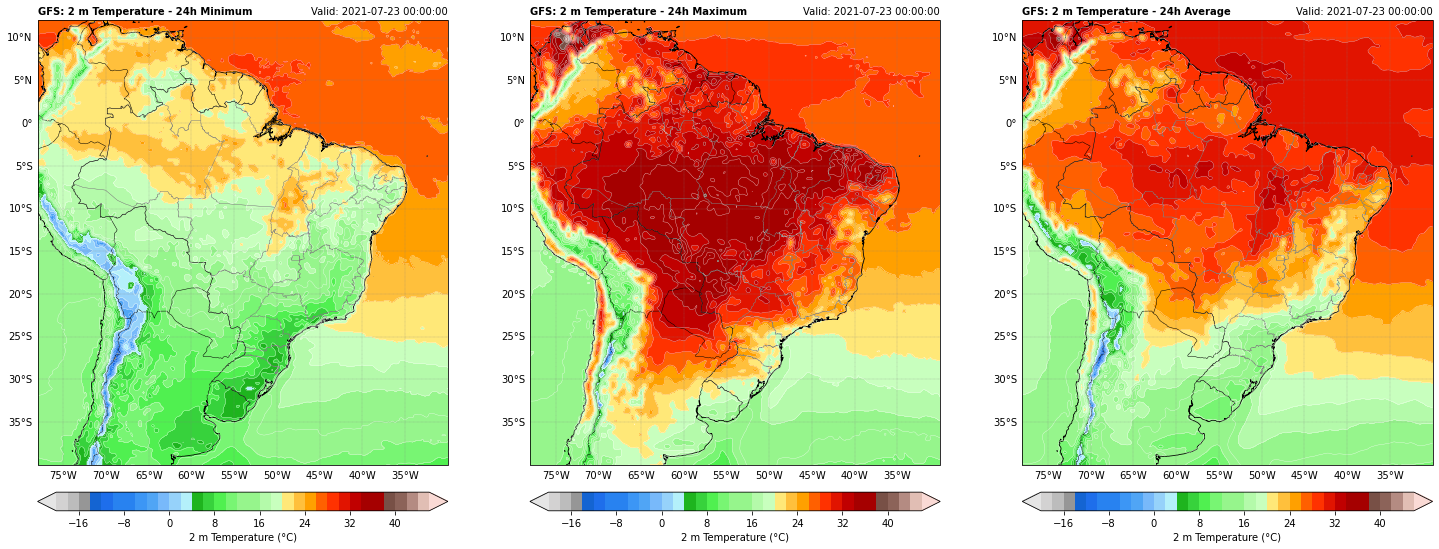

In [2]:
#-----------------------------------------------------------------------------------------------------------
# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", 
"#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", 
"#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", 
"#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", 
"#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')
#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
fig, axs = plt.subplots(1,3, figsize=(25,25), sharex = False, sharey = False, subplot_kw=dict(projection=ccrs.PlateCarree())) # 1 row x 3 columns

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img1 = axs[0].contourf(lons, lats, tmtmp_min, cmap=cmap, levels=levels, extend='both')    
img2 = axs[0].contour(lons, lats, tmtmp_min, colors='white', linewidths=0.3, levels=levels)
#axs[0].clabel(img2, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[0])

# Add a title
axs[0].set_title('GFS: 2 m Temperature - 24h Minimum' , fontweight='bold', fontsize=10, loc='left')
axs[0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
axs[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img3 = axs[1].contourf(lons, lats, tmtmp_max, cmap=cmap, levels=levels, extend='both')    
img4 = axs[1].contour(lons, lats, tmtmp_max, colors='white', linewidths=0.3, levels=levels)
#axs[1].clabel(img3, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img3, label='2 m Temperature (°C)', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[1])

# Add a title
axs[1].set_title('GFS: 2 m Temperature - 24h Maximum' , fontweight='bold', fontsize=10, loc='left')
axs[1].set_title('Valid: ' + valid, fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[2].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('Shapefile/BR_UF_2019.shp').geometries())
axs[2].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[2].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[2].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[2].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img3 = axs[2].contourf(lons, lats, tmtmp_avg, cmap=cmap, levels=levels, extend='both')    
img4 = axs[2].contour(lons, lats, tmtmp_avg, colors='white', linewidths=0.3, levels=levels)
#axs[2].clabel(img3, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img3, label='2 m Temperature (°C)', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[2])

# Add a title
axs[2].set_title('GFS: 2 m Temperature - 24h Average' , fontweight='bold', fontsize=10, loc='left')
axs[2].set_title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('Figure/image_11.png')

# Show the image
plt.show()  